
# Project: Investigate a Dataset (TMDB movie dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

I analysed the Dataset and tried to answer the folowing questions through this notebook:-

1-Which year has the highest release of movies?

2-Top 10 movies which earn highest/Lowest profit?

3-Movie with Highest And Lowest Budget?

4-Which movie made the highest revenue and lowest as well?

5-Movie with shorest and longest runtime?

6-Which movie get the highest or lowest votes (Ratings).

7-which year has the highest release of movies?

8-Find Top 20 actors with the most appearances in films




In [129]:
# importing built-in Function for my analysis
import numpy as np
import operator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
#import data to notebook
df = pd.read_csv('tmdb_movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [46]:
#data_info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [47]:
#data contains 10866 sample films 

# First Cleaning Step is to check for rows duplicates.

# checking for dulpicates rows
sum(df.duplicated())
df.drop_duplicates(inplace=True)
df.info()# 1 item dropped Out

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [48]:
#the data information shows that missing values are in columns
#['cast','homepage','director','tagline','keywords','overview','genres','production_companies']

Missing_val=['cast','homepage','director','tagline','keywords','overview','genres','production_companies']
Missing_val_res=[]
#counting the total number of rows with at least one missing data.any(axis = 1)
for i in Missing_val:
    Missing_val=df[i].isnull().sum()
    print(Missing_val)


76
7929
44
2824
1493
4
23
1030


In [49]:
# Missing data are strings type, unique for each sample cannot be replaced by any statistical calculation 
#such as mean and mode values to preserve the data credibility and consistency.

# my first assumption is to delete columns with Missing data not included in my queries 
#['homepage','tagline','keywords','overview']

# my second assumption is to delete 'revenue','budget' columns as both of them are included adjusted by the dataset owner
#in another columns name 'budget_adj','revenue_adj'
df.drop(['homepage','tagline','keywords','overview','revenue','budget'], axis=1, inplace=True)

In [50]:
# I eleminated 7 columns out of 21
df.shape

(10865, 15)

In [51]:
# Second Cleaning Step is to check for columns with null values and calculates their quantities.
# Data contaings Null values in differeny columns 
# My strategy was to start by elimanting columns with high percentage of NULL values
# to maintain the data sample as large as possible.

# show only cloumns with NaN values for both production and cast columns

null_data = df[df['production_companies'].isnull() & df['cast'].isnull()]
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 536 to 10754
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    40 non-null     int64  
 1   imdb_id               40 non-null     object 
 2   popularity            40 non-null     float64
 3   original_title        40 non-null     object 
 4   cast                  0 non-null      object 
 5   director              35 non-null     object 
 6   runtime               40 non-null     int64  
 7   genres                40 non-null     object 
 8   production_companies  0 non-null      object 
 9   release_date          40 non-null     object 
 10  vote_count            40 non-null     int64  
 11  vote_average          40 non-null     float64
 12  release_year          40 non-null     int64  
 13  budget_adj            40 non-null     float64
 14  revenue_adj           40 non-null     float64
dtypes: float64(4), int64

In [52]:
# 3rd Assumption is to drop all rows where production company value is null. 
df=df.dropna(subset=['production_companies'])

In [53]:
# dropn all rows where genres values are null. 
df=df.dropna(subset=['genres'])

In [54]:
# dropn all rows where cast value are null. 
df=df.dropna(subset=['cast'])

In [55]:
# dropn all rows where director values are null. 
df=df.dropna(subset=['director'])

In [56]:
# dropn all rows where imdb_id values are null. 
df=df.dropna(subset=['imdb_id'])

In [61]:
# adjust names for columns
df = df.rename(columns={'revenue_adj': 'revenue', 'budget_adj': 'budget'})

In [62]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9770 non-null   int64  
 1   imdb_id               9770 non-null   object 
 2   popularity            9770 non-null   float64
 3   original_title        9770 non-null   object 
 4   cast                  9770 non-null   object 
 5   director              9770 non-null   object 
 6   runtime               9770 non-null   int64  
 7   genres                9770 non-null   object 
 8   production_companies  9770 non-null   object 
 9   release_date          9770 non-null   object 
 10  vote_count            9770 non-null   int64  
 11  vote_average          9770 non-null   float64
 12  release_year          9770 non-null   int64  
 13  budget                9770 non-null   float64
 14  revenue               9770 non-null   float64
dtypes: float64(4), int64

In [63]:
df.head(2)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [64]:

df.shape

(9770, 15)

In [65]:
#show column names
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'original_title',
 'cast',
 'director',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget',
 'revenue']

In [66]:
# Last cleaning step is to check for zero values in data.(only for float ot integer dtype columns)
df.astype(bool).sum(axis=0)

# budget has 5021 zero values
# revenue has 4750 zero values


id                      9770
imdb_id                 9770
popularity              9770
original_title          9770
cast                    9770
director                9770
runtime                 9757
genres                  9770
production_companies    9770
release_date            9770
vote_count              9770
vote_average            9770
release_year            9770
budget                  5021
revenue                 4750
dtype: int64

In [105]:
# 4th assumption is to replace budget zero values by budget column mean value
#---------------------------------------------------------------------------------

mean_bud = df['budget'].mean()
# 5 th assumption is to replace revenue zero values by revenue column mean value
#----------------------------------------------------------------------------------
mean_rev = df['revenue'].mean()
# 6 th assumption is to replace runtime zero values by runtime column mean value
#----------------------------------------------------------------------------------
mean_rtime = df['runtime'].mean()
print(mean_bud,mean_rev,mean_rtime)
df['budget']=df['budget'].replace(0,mean_bud)
df['revenue']=df['revenue'].replace(0,mean_rev)
df['runtime']=df['runtime'].replace(0,mean_rtime)

28859618.41804646 86385669.6322604 103.07658290109573


In [106]:
# check zero value for the dataframe
df.astype(bool).sum(axis=0)

id                      9770
imdb_id                 9770
popularity              9770
original_title          9770
cast                    9770
director                9770
runtime                 9770
genres                  9770
production_companies    9770
release_date            9770
vote_count              9770
vote_average            9770
release_year            9770
budget                  9770
revenue                 9770
dtype: int64

In [ ]:
# data is now clean, complete and we can start the investigation.
# Data finally consisit of:-
#9770 rows out of 10865 
#15 column out of 21

<a id='eda'></a>
## Exploratory Data Analysis



### Question # 1: Which year has the highest release of movies?

In [107]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# 
df_high_rel=df.groupby(['release_year']).count().sort_values(['original_title'],ascending=False)['original_title']
# It can be seen from the results that year 2014 was the highest_release year.
df_high_rel.head(10)

release_year
2014    635
2013    567
2015    558
2012    498
2009    472
2011    456
2008    441
2010    420
2007    389
2006    350
Name: original_title, dtype: int64

###  Question # 2:
###  Top 10 movies which earn Lowest profit? AND TOP 10 movies which earn highest profit?

In [108]:
# profit=revenue-budget
#we need to create a new column name profit
df['Profit']=df['revenue']-df['budget']
# sort by top 10
print('\n Top_10\n')
print('-'*30)
top_10= df.sort_values(['Profit'],ascending=False)
top_10=top_10[['original_title','Profit']]
print(top_10.head(10))
# sort by Lowest 10
print('\n Lowest_10\n')
print('-'*30)
Lowest_10= df.sort_values(['Profit'],ascending=True)
Lowest_10=Lowest_10[['original_title','Profit']]
#show results
print(Lowest_10.head(10))
#df.info()



 Top_10

------------------------------
                       original_title        Profit
1329                        Star Wars  2.750137e+09
1386                           Avatar  2.586237e+09
5231                          Titanic  2.234714e+09
10594                    The Exorcist  2.128036e+09
9806                             Jaws  1.878643e+09
8889       E.T. the Extra-Terrestrial  1.767968e+09
3        Star Wars: The Force Awakens  1.718723e+09
8094                          The Net  1.551568e+09
10110  One Hundred and One Dalmatians  1.545635e+09
7309          The Empire Strikes Back  1.376998e+09

 Lowest_10

------------------------------
                    original_title        Profit
2244             The Warrior's Way -4.139124e+08
5508               The Lone Ranger -1.551102e+08
7031                     The Alamo -1.375868e+08
2435              The 13th Warrior -1.286813e+08
4970                  Brother Bear -1.185350e+08
8102              Cutthroat Island -1.137371e+08


###  Question # 3:

###  Movie with Highest And Lowest Budget? 

In [109]:
HB= df.sort_values(['budget'],ascending=False)
HB=HB[['original_title','budget']]
LB= df.sort_values(['budget'],ascending=True)
LB=LB[['original_title','budget']]
print('\n LB \n',LB.head(1)),print('\n HB \n',HB.head(1))


 LB 
      original_title    budget
1151    Fear Clinic  0.921091

 HB 
          original_title       budget
2244  The Warrior's Way  425000000.0


(None, None)

###  Question # 4:

### Which movie made the highest revenue and lowest as well?

In [111]:
HR= df.sort_values(['revenue'],ascending=False)
HR=HR[['original_title','revenue']]
LR= df.sort_values(['revenue'],ascending=True)
LR=LR[['original_title','revenue']]
print('\n LR \n',LR.head(1)),print('\n HR \n',HR.head(1))


 LR 
        original_title   revenue
5067  Shattered Glass  2.370705

 HR 
      original_title       revenue
1386         Avatar  2.827124e+09


(None, None)

###  Question # 5:

### Movie with shorest and longest runtime?

In [112]:

Low_runtime= df.sort_values(['runtime'],ascending=False)
Low_runtime=Low_runtime[['original_title','runtime']]
High_runtime= df.sort_values(['runtime'],ascending=True)
High_runtime=High_runtime[['original_title','runtime']]
print('\n Low_runtime \n',Low_runtime.head(1)),print('\n High_runtime \n',High_runtime.head(1))


 Low_runtime 
      original_title  runtime
4041          Taken    877.0

 High_runtime 
                             original_title  runtime
3891  Scrat's Continental Crack-Up: Part 2      3.0


(None, None)

###  Question # 6:

###  Which movie get the highest or lowest votes (Ratings).

In [113]:
#Which movie get the highest or lowest votes (Ratings).
Low_ratings= df.sort_values(['vote_count'],ascending=True)
Low_ratings=Low_ratings[['original_title','vote_count']]
High_ratings= df.sort_values(['vote_count'],ascending=False)
High_ratings=High_ratings[['original_title','vote_count']]
print('\n Low_ratings \n',Low_ratings.head(1)),print('\n High_ratings \n',High_ratings.head(1))


 Low_ratings 
                 original_title  vote_count
7236  Chris Rock: Never Scared          10

 High_ratings 
      original_title  vote_count
1919      Inception        9767


(None, None)

###  Visulaization_part1   

### Question # 7:

###  which year has the highest release of movies?

Text(0, 0.5, 'Num Of Movies')

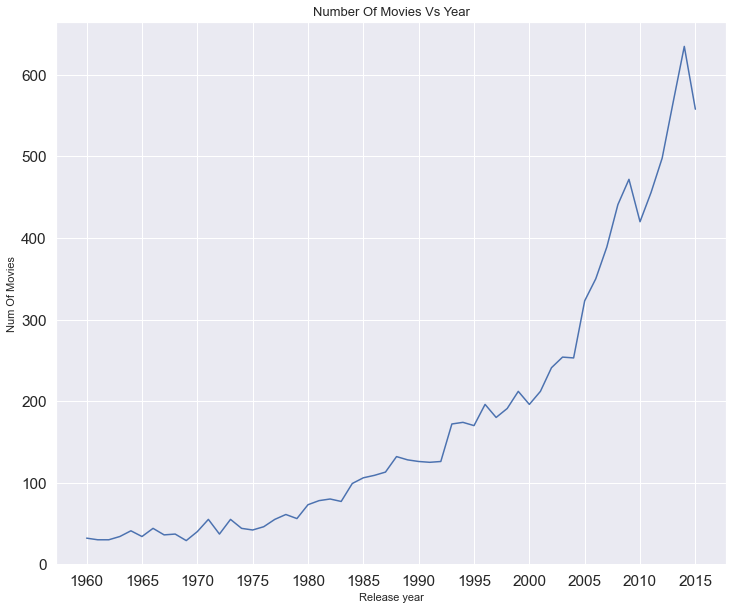

In [159]:
# Visulaization_part1
#Which year has the highest release of movies?
data=df.groupby('release_year').count()['id']

#grouping films according to their release year then counting the total number of movies in each year.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#figure settings
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Number Of Movies Vs Year",fontsize = 13)
plt.xlabel('Release year',fontsize = 11)
plt.ylabel('Num Of Movies',fontsize = 11)

###  Visulaization_part_2   

### Question # 8:

### Find Top 20 actors with the most appearances in films

In [160]:
# Function to define the xaxis label angel of rotation
def rot_xaxis_plot(i):
    for item in ax.get_xticklabels():
        item.set_rotation(i)
    return ()

C:\Users\Mega Store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


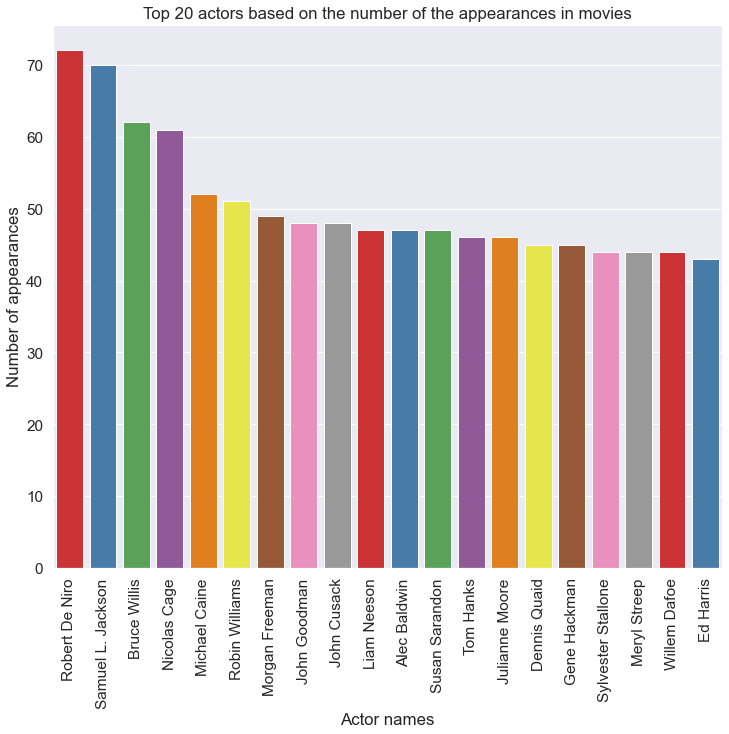

In [162]:


#Creating a numpy array to store how many times each actor casted for movies

actor_dict = {}

actors = df["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    for actor in actorList:
        actor = actor.lstrip() 
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                
# sort actors in descending order
sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)

x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])

# Visualization settings
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set1")
ax.set(xlabel='Actor names', ylabel='Number of appearances', title = 'Top 20 actors based on the number of the appearances in movies')

rot_xaxis_plot(90)
    

plt.show()

###  Conclusions
##### We can conclude from the above analysis that year 2014 was the greatest year of film production was 2014 (from year 1960 upto 2015) .            - Top 3 movie with high profits: Starwar, Avatar & Titanic the lowest 3 films in terms of profits are the warrior way, the Lone Ranger and the Alamo.   -The film with the highest budget was the Warrior way and lowest budget was Fear Clinic.                                                                                                   - The film with the highest revenue was shattered glass and lowest revenue was Avatar.                                                                                                        - The longest film duration was Taken and the shortest one was Scrat's continental crack-up part-2.                                                                                    - From figure No 1 we can conclude that film production increased gradualy starting from 1960 until 2014 reached its peak then decayed in 2015.        - My last finding was the most top 3 actors appeared in movies during this period was Robert Dinero, samuel Jackson and Bruce wills and in fact they deserve being leading Actors.

###  Limitations
##### This analysis was done considering the movies produced between 1960 and 2015 with significant amount of profit of around 50 million dollar, which is not last updated data until 2021,results may differ accordingly. the dataset has some limitation regading the units of measurment of rutime and currency of the revenue, budget was not clearly stated in dataset and assumed to be US-Dollar and time measurment in minutes,  Dropping some rows with missing values and data imputation with mean values to complete the missing values in budget and revenue columns may offset the results. however, dataset was very rich in information. I beleive there much more work and investigation still need to be conducted to useful results.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Udacity_Project_data_analysis_rev.1.ipynb'])